<a href="https://colab.research.google.com/github/SP-TechForest/Python-creations/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import sklearn 
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Linear Regression. 

In [ ]:
data = pd.read_csv("Salary_Data.csv")

In [ ]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
data.isna().mean(), data.shape

(YearsExperience    0.0
 Salary             0.0
 dtype: float64, (30, 2))

In [ ]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [ ]:
x,y

(array([[ 1.1],
        [ 1.3],
        [ 1.5],
        [ 2. ],
        [ 2.2],
        [ 2.9],
        [ 3. ],
        [ 3.2],
        [ 3.2],
        [ 3.7],
        [ 3.9],
        [ 4. ],
        [ 4. ],
        [ 4.1],
        [ 4.5],
        [ 4.9],
        [ 5.1],
        [ 5.3],
        [ 5.9],
        [ 6. ],
        [ 6.8],
        [ 7.1],
        [ 7.9],
        [ 8.2],
        [ 8.7],
        [ 9. ],
        [ 9.5],
        [ 9.6],
        [10.3],
        [10.5]]),
 array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
         54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
         61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
         98273., 101302., 113812., 109431., 105582., 116969., 112635.,
        122391., 121872.]))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((24, 1), (6, 1), (24,), (6,))

In [ ]:
px.imshow(data.corr())
px.scatter_matrix(data)

In [ ]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [ ]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(x_test)

In [ ]:
import sklearn
sklearn.metrics.r2_score(y_test, y_pred)*100

98.8169515729126

In [ ]:
sklearn.metrics.mean_absolute_error(y_test, y_pred)

2446.1723690465055

In [ ]:
sklearn.metrics.mean_squared_error(y_test, y_pred)

12823412.298126549

In [ ]:
len(x_test.tolist())

6

In [ ]:
len(y_test)

6

(<matplotlib.collections.PathCollection at 0x7fd8f69997d0>,
 <matplotlib.collections.PathCollection at 0x7fd8f6999290>)

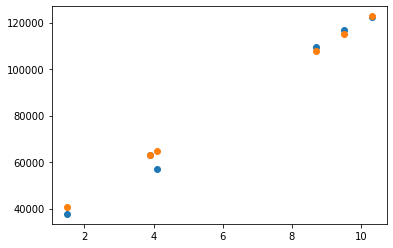

In [ ]:
plt.scatter(x=x_test.tolist(), y = y_test), plt.scatter(x = x_test.tolist(), y = y_pred)

In [ ]:
y_test

array([ 37731., 122391.,  57081.,  63218., 116969., 109431.])

In [ ]:
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [ ]:
x_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7]])

# Multiple Linear Regression

In [4]:
startups_data = pd.read_csv("50_Startups.csv")

In [5]:
startups_data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
# we have used whole dataset for onehot encoding, so drop_first won't work. 
startups_data = pd.get_dummies(startups_data, drop_first=True)

In [7]:
startups_data.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [8]:
feature = startups_data.drop(columns=["Profit"])

In [9]:
feature.head()

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [10]:
target = startups_data['Profit'].values
feature = feature.values

In [11]:
scalar = MinMaxScaler()
scalar.fit(feature)

MinMaxScaler()

In [12]:
feature = scalar.transform(feature)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(feature,target, test_size=0.2, random_state=0)

In [14]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((40, 5), (10, 5), (40,), (10,))

In [15]:
ML_regressor = LinearRegression()

In [16]:
ML_regressor.fit(x_train, y_train)

LinearRegression()

In [17]:
y_pred = ML_regressor.predict(x_test)

In [18]:
np.set_printoptions(precision=2)
np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

array([[103015.2 , 103282.38],
       [132582.28, 144259.4 ],
       [132447.74, 146121.95],
       [ 71976.1 ,  77798.83],
       [178537.48, 191050.39],
       [116161.24, 105008.31],
       [ 67851.69,  81229.06],
       [ 98791.73,  97483.56],
       [113969.44, 110352.25],
       [167921.07, 166187.94]])

#ML with backword and forward selection 

In [19]:
import sklearn

In [20]:
sklearn.metrics.r2_score(y_test, y_pred)

0.9347068473282426

In [28]:
D = np.append(arr = np.ones((50,1)).astype(int), values=feature, axis=1)

In [35]:
D_opt = D[:,[0,1,2,3,4]]

In [30]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [36]:
regressor_ols = sm.OLS(endog = target, exog = D_opt).fit()

In [37]:
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Thu, 17 Mar 2022   Prob (F-statistic):           8.49e-29
Time:                        23:55:53   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.872e+04   4385.308     11.110      0.000    3.99e+04    5.76e+04
x1          1.333e+05   7569.402     17.606      0.000    1.18e+05    1.49e+05
x2         -3546.1802   6784.012     -0.523      0.604   -1.72e+04    1.01e+04
x3          1.273e+04   7997.047      1.592      0.118   -3378.261    2.88e+04
x4           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                         11.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
sfs1 = SFS(ML_regressor, k_features=2, 
           forward=False, verbose=1, scoring='neg_mean_squared_error')

In [58]:
sfs_Back_1 = sfs1.fit(feature, target)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
Features: 4/2[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished
Features: 3/2[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
Features: 2/2

In [59]:
sfs_Back_1.subsets_

{2: {'avg_score': -94580206.64311814,
  'cv_scores': array([-3.05e+07, -1.20e+08, -3.18e+07, -7.49e+07, -2.16e+08]),
  'feature_idx': (0, 2),
  'feature_names': ('0', '2')},
 3: {'avg_score': -94747289.30392042,
  'cv_scores': array([-3.08e+07, -1.20e+08, -3.18e+07, -7.49e+07, -2.16e+08]),
  'feature_idx': (0, 2, 3),
  'feature_names': ('0', '2', '3')},
 4: {'avg_score': -95038747.96464536,
  'cv_scores': array([-3.13e+07, -1.19e+08, -3.02e+07, -7.22e+07, -2.22e+08]),
  'feature_idx': (0, 1, 2, 3),
  'feature_names': ('0', '1', '2', '3')},
 5: {'avg_score': -103214540.65469578,
  'cv_scores': array([-3.20e+07, -1.32e+08, -3.81e+07, -7.47e+07, -2.40e+08]),
  'feature_idx': (0, 1, 2, 3, 4),
  'feature_names': ('0', '1', '2', '3', '4')}}

In [61]:
sfs_Back_1.k_feature_names_

('0', '2')

In [66]:
dummies = pd.get_dummies(startups_data, drop_first=True)

In [67]:
dummies.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [69]:
f = dummies.drop(columns = ["Profit"])
t = dummies["Profit"]

In [83]:
feature_name = list(f.columns)

In [84]:
feature_name

['R&D Spend',
 'Administration',
 'Marketing Spend',
 'State_Florida',
 'State_New York']

In [85]:
sfs_Back_1 = sfs1.fit(f.values,t.values, custom_feature_names=feature_name)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished
Features: 4/2[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s finished
Features: 3/2[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
Features: 2/2

In [89]:
sfs_Back_1.k_feature_names_

('R&D Spend', 'Marketing Spend')

In [91]:
feature_back = startups_data[['R&D Spend', 'Marketing Spend']].values

In [92]:
x_train, x_test, y_train, y_test = train_test_split(feature_back,target, test_size=0.2, random_state=0)

In [93]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((40, 2), (10, 2), (40,), (10,))

In [94]:
ML_regressor.fit(x_train, y_train)

LinearRegression()

In [95]:
y_p = ML_regressor.predict(x_test)

In [96]:
np.concatenate((y_p.reshape(len(y_p),1),y_test.reshape(len(y_test),1)),1)

array([[102284.65, 103282.38],
       [133873.92, 144259.4 ],
       [134182.15, 146121.95],
       [ 73701.11,  77798.83],
       [180642.25, 191050.39],
       [114717.25, 105008.31],
       [ 68335.08,  81229.06],
       [ 97433.46,  97483.56],
       [114580.92, 110352.25],
       [170343.32, 166187.94]])

In [99]:
sklearn.metrics.r2_score(y_test, y_p), sklearn.metrics.r2_score(y_test, y_pred)

(0.9474386447268489, 0.9347068473282426)